# Feature Engineering

This Note book aims to analyze the dataset and perform data preprocessing
We aim to convert
* signal1 and signal2 into feature <b>X</b>
* Label column as output/target <b>y</b>. This will be the value that will be predicted by the ML model.
* Split the dataset into training and testing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import sys
import os

sys.path.append(os.path.abspath('..'))


Loading the Dataset

In [6]:
df = pd.read_csv('../data/intern_dataset.csv')
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [7]:
#Different values of Label
df["Label"].unique()

array(['A', 'C', 'B'], dtype=object)

As we can see the column Label have to be encoded into numbers 
- A: 0
- B: 1
- C: 2

In [8]:
# create a mapping for the labels
label_mapping = {'A': 0, 'B': 1, 'C':2}
df['Label'] = df["Label"].map(label_mapping)
print(df['Label'].unique())

[0 2 1]


In [9]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,0
1,2017-08-14 11:37:49.801,32564.903040,0.856705,0
2,2017-08-14 11:37:49.811,31454.043305,0.856683,0
3,2017-08-14 11:37:49.821,30335.387166,0.856659,0
4,2017-08-14 11:37:49.831,29207.142938,0.856634,0


# Splitting into Training and Testing Data

* Splitting the dataset into training and testing dataset with 80:20 ratio
* performing stratified splitting
* splitting 80% of one class (say A) into training and testing

In [11]:
from sklearn.model_selection import train_test_split

train_df , test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['Label'],
    random_state=42
)

train dataframe

In [12]:
print(f"Length of training data: {len(train_df)}")
print(f"shape of training data: {train_df.shape}")
train_df.head()

Length of training data: 729600
shape of training data: (729600, 4)


,Time,Signal1,Signal2,Label
471431,2017-08-12 11:34:00.095,32179.988884,0.162510,2
128123,2017-08-14 11:59:11.021,17172.213508,0.493421,0
845107,2020-01-04 10:44:40.306,28430.397214,0.154110,2
890176,2020-01-04 10:52:10.996,33473.065843,0.152017,2
6500,2017-08-14 11:38:54.791,65986.950924,0.818657,0


sort by time maybe

In [15]:
train_df_sorted = train_df.sort_values(by='Time')

In [16]:
train_df_sorted.head()

,Time,Signal1,Signal2,Label
318000,2017-08-12 11:08:25.785,22719.403196,0.123263,2
318001,2017-08-12 11:08:25.795,23608.265317,0.123268,2
318002,2017-08-12 11:08:25.805,24524.544926,0.123273,2
318003,2017-08-12 11:08:25.815,25479.836092,0.123279,2
318004,2017-08-12 11:08:25.825,26475.848059,0.123285,2


Test Dataframe

In [ ]:
print(f"Length of testing data: {len(test_df)}")
print(f"shape of testing data: {test_df.shape}")

test_df_sorted = test_df.sort_values(by='Time')
test_df.head()

Length of training data: 182400
shape of training data: (182400, 4)


,Time,Signal1,Signal2,Label
116567,2017-08-14 11:57:15.461,30021.645076,0.478416,0
754779,2017-09-26 12:45:36.204,32144.277780,0.587721,1
594817,2017-09-19 12:32:33.868,28701.422685,0.994518,1
344181,2017-08-12 11:12:47.595,22737.681620,0.154658,2
200059,2017-09-19 11:54:04.788,44644.689163,0.248896,0


In [18]:
test_df_sorted.head()

,Time,Signal1,Signal2,Label
318006,2017-08-12 11:08:25.845,28539.603182,0.123298,2
318023,2017-08-12 11:08:26.015,32590.920142,0.123475,2
318026,2017-08-12 11:08:26.045,31241.098157,0.123520,2
318028,2017-08-12 11:08:26.065,30336.408146,0.123553,2
318032,2017-08-12 11:08:26.105,28870.897606,0.123623,2


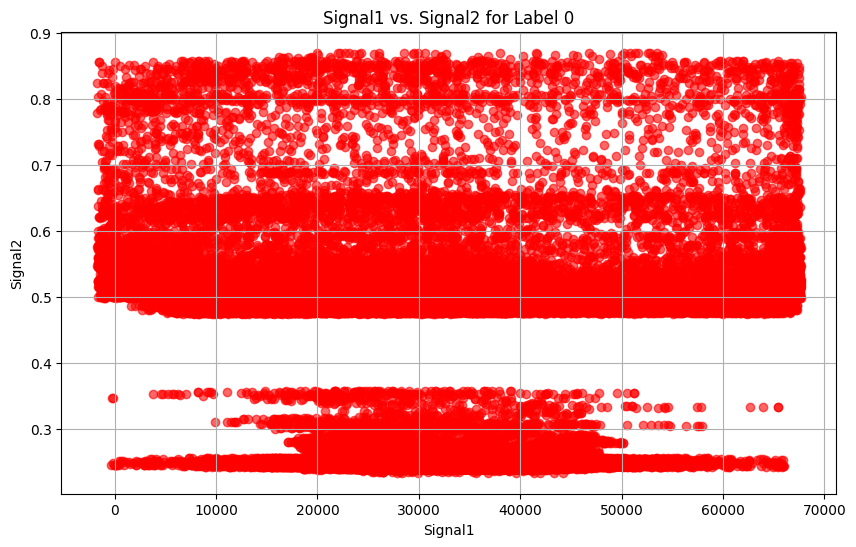

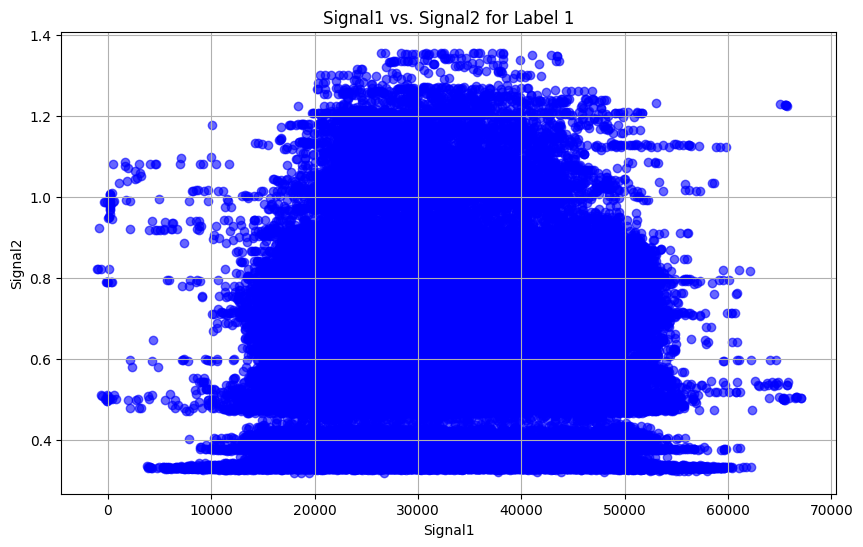

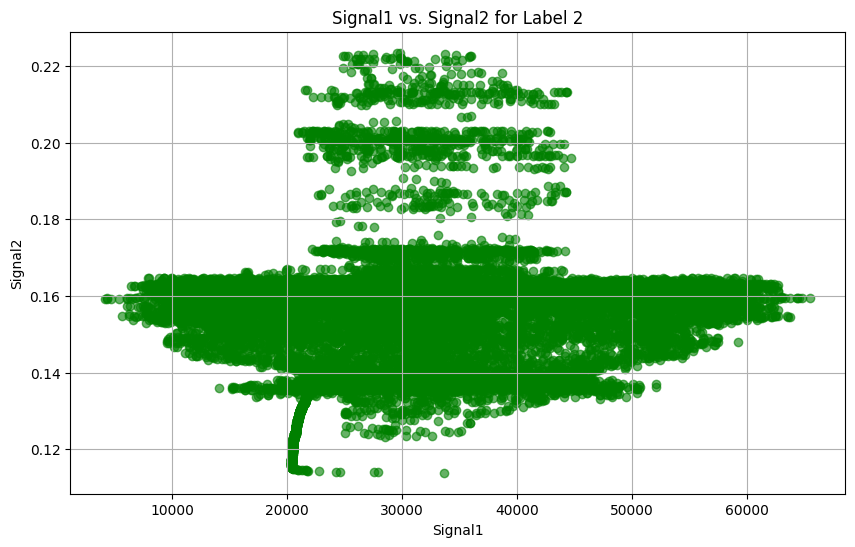

In [25]:
from utils.visualize import get_signal1_signal2

get_signal1_signal2(test_df, 0 , "red")
get_signal1_signal2(test_df, 1 , "blue")
get_signal1_signal2(test_df, 2 , "green")


# Saving the preprocessed data into csv

In [26]:
from pathlib import Path

train_path = Path('../data/train')
test_path = Path("../data/test")
print(f"Train path: {train_path}")
print(f"Test path: {test_path}")

Train path: ..\data\train
Test path: ..\data\test


In [30]:

def convert_to_csv():
    train_df.to_csv(train_path / 'train_data.csv', index=False)
    test_df.to_csv(test_path / 'test_data.csv', index=False)
    train_df_sorted.to_csv(train_path / 'train_data_sorted.csv', index=False)
    test_df_sorted.to_csv(test_path / 'test_data_sorted.csv', index=False)

try:
    print("Converting to csv files...")
    convert_to_csv()
    print("completed")
except OSError:
    print("Folder not found. creating one ...")
    print("restarting ...")
    train_path.mkdir()
    test_path.mkdir()
    convert_to_csv()
    print("completed")

Converting to csv files...
completed
